# 注意力提示

## 1. 生物学中的注意力提示
注意⼒是如何应⽤于视觉世界中的呢？这要从当今⼗分普及的双组件（two-component）的框架开始讲起：
这个框架的出现可以追溯到19世纪90年代的威廉·詹姆斯，他被认为是“美国⼼理学之⽗”(James, 2007)。在这个框架中，受试者基于⾮⾃主性提⽰和⾃主性提⽰有选择地引导注意⼒的焦点。
+ ⾮⾃主性提⽰是基于环境中物体的突出性和易⻅性。
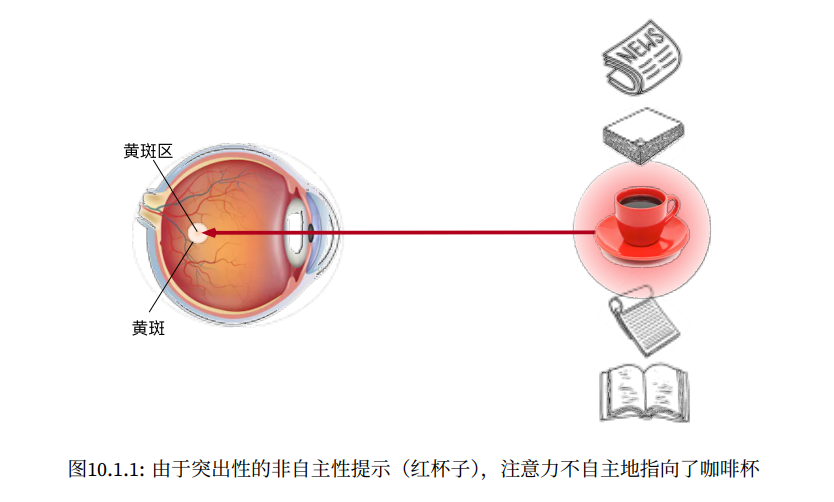
+ 由于突出性导致的选择不同，此时选择书是受到了认知和意识的控制，因此注意⼒在基于⾃主性提⽰去辅助选择时将更为谨慎。受试者的主观意愿推动，选择的⼒量也就更强⼤。
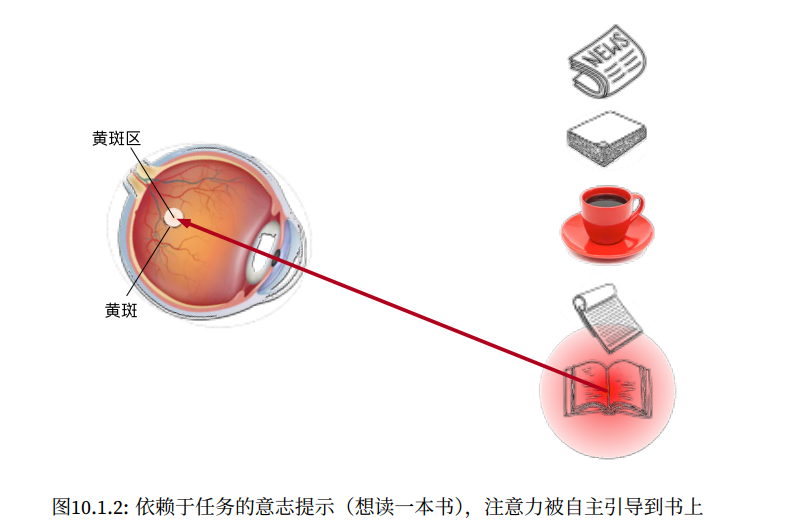

## 2. 查询、键和值
⾸先，考虑⼀个相对简单的状况，即只使⽤⾮⾃主性提⽰。要想将选择偏向于感官输⼊，则可以简单地使⽤参数化的全连接层，甚⾄是⾮参数化的最⼤汇聚层或平均汇聚层。


因此，“是否包含⾃主性提⽰”将注意⼒机制与全连接层或汇聚层区别开来。在注意⼒机制的背景下，⾃主性提⽰被称为查询（query）。给定任何查询，注意⼒机制通过注意⼒汇聚（attention pooling）将选择引导⾄感官输⼊（sensory inputs，例如中间特征表⽰）。在注意⼒机制中，这些感官输⼊被称为值（value）。更通俗的解释，每个值都与⼀个键（key）配对，这可以想象为感官输⼊的⾮⾃主提⽰。如 图10.1.3所⽰，**可以通过设计注意⼒汇聚的⽅式，便于给定的查询（自主性提示）与键（非自主性提示）进⾏匹配，这将引导得出最匹配的值（感官输⼊）**。
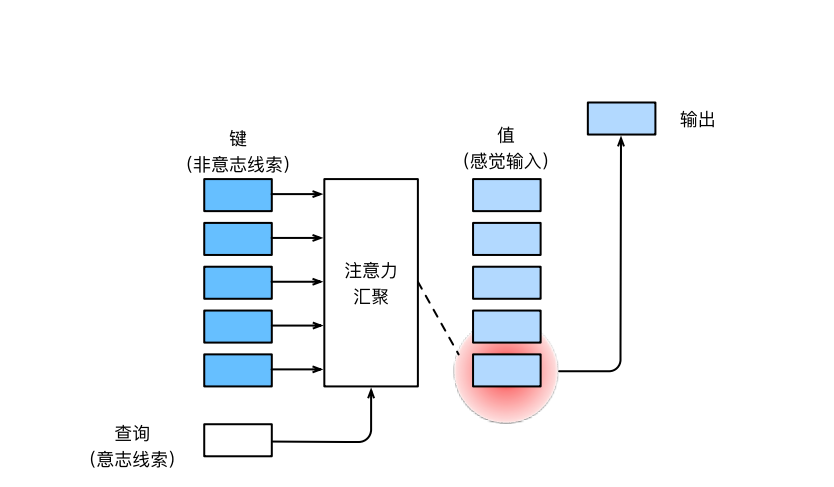
感兴趣的为query， 环境为key-value，注意力机制会根据query有偏向性地选择某些键值对

## 3. 注意力的可视化
平均汇聚层可以被视为输⼊的加权平均值，其中各输⼊的权重是⼀样的。实际上，注意⼒汇聚得到的是加权平均的总和值，其中权重是在给定的查询和不同的键之间计算得出的。


In [1]:
import torch 
from d2l import torch as d2l

为了可视化注意⼒权重，需要定义⼀个show_heatmaps函数。其输⼊matrices的形状是（要显⽰的⾏数，要显⽰的列数，查询的数⽬，键的数⽬）。


In [2]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                 cmap='Reds'):
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
                
            if titles:
                ax.set_title(titles[j])
                
        
        fig.colorbar(pcm, ax=axes, shrink=0.6)

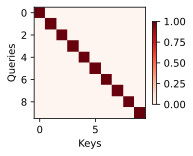

In [3]:
#在本例⼦中，仅当查询和键相同时，注意⼒权重为1，否则为0。
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

## 总结
+ ⼈类的注意⼒是有限的、有价值和稀缺的资源。
+ 受试者使⽤⾮⾃主性和⾃主性提⽰有选择性地引导注意⼒。前者基于突出性，后者则依赖于意识。
+ 注意⼒机制与全连接层或者汇聚层的区别源于增加的⾃主提⽰。
+ 由于包含了⾃主性提⽰，注意⼒机制与全连接的层或汇聚层不同。
+ 注意⼒机制通过注意⼒汇聚使选择偏向于值（感官输⼊），其中包含查询（⾃主性提⽰）和键（⾮⾃主性提⽰）。键和值是成对的。
+ 可视化查询和键之间的注意⼒权重是可⾏的。
